# Phase 3 :

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score

df = pd.read_csv('Dataset/The_Processed_data.csv');
print(df)

      Unnamed: 0  Patient ID   Age  Sex   Cholesterol  Systolic BP  \
0              0         241     1    1             0     0.755556   
1              1         455     2    1             1     0.833333   
2              2         247     2    0             1     0.933333   
3              3        1468     1    1             1     0.811111   
4              4         972     1    1             1     0.011111   
...          ...         ...   ...  ...           ...          ...   
3995        3995        3099     1    1             0     0.911111   
3996        3996        2881     0    0             2     0.211111   
3997        3997         400     1    1             2     0.700000   
3998        3998         623     1    1             1     0.211111   
3999        3999        3387     0    0             2     0.111111   

      Diastolic BP   Heart Rate  Diabetes  Family History  Smoking  Diet  \
0             0.56     0.457143         0               0        1     0   
1      

# Balance Data:

Check if the data is balanced or not:

In [3]:
value = df['Heart Attack Risk']

num1 = value[value == 1].count()
num2 = value[value == 0].count()

total = num1 + num2
percentage1= (num1 / total) * 100
percentage2 = (num2 / total) * 100

print("Number of people that have a risk of heart attack :", num1)
print("Number of people that have not a risk of heart attack.", num2)
print(" ")
print("Percentage of people who have a risk of heart attack: {:.2f}%".format(percentage1))
print("Percentage of people who have not a risk of heart attack: {:.2f}%".format(percentage2))

Number of people that have a risk of heart attack : 1852
Number of people that have not a risk of heart attack. 2148
 
Percentage of people who have a risk of heart attack: 46.30%
Percentage of people who have not a risk of heart attack: 53.70%



The number of people is 4000; we note that 1852 are at risk of having a heart attack, while 2148 are not at risk. In addition, we note that the data is balanced, as the percentage of those exposed to a risk is 46.3% and the percentage of those not exposed is 53.7%.

# Classification:

# Split the data into features and target variable

The code separates the features from the target variable, where X contains the features (all columns except the last one), and y contains the target variable "Heart Attack Risk."

In [4]:
fn= df.keys().tolist()[:-1]
X= df[fn]
y=df["Heart Attack Risk"]
print(X)

      Unnamed: 0  Patient ID   Age  Sex   Cholesterol  Systolic BP  \
0              0         241     1    1             0     0.755556   
1              1         455     2    1             1     0.833333   
2              2         247     2    0             1     0.933333   
3              3        1468     1    1             1     0.811111   
4              4         972     1    1             1     0.011111   
...          ...         ...   ...  ...           ...          ...   
3995        3995        3099     1    1             0     0.911111   
3996        3996        2881     0    0             2     0.211111   
3997        3997         400     1    1             2     0.700000   
3998        3998         623     1    1             1     0.211111   
3999        3999        3387     0    0             2     0.111111   

      Diastolic BP   Heart Rate  Diabetes  Family History  Smoking  Diet  \
0             0.56     0.457143         0               0        1     0   
1      

# Information Gain (entropy):
# Splitting Data into: 70% Training and 30% Test

The model is trained utilizing the information gain(entropy), and the dataset is divided into 70% training and 30% testing subsets.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Create decision tree classifer object:
clf_entropy = DecisionTreeClassifier(criterion='entropy')

#Train decision tree classifer
clf_entropy= clf_entropy.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_entropy = clf_entropy.predict (X_test)

# confusion matrix:


[[367 259]
 [291 283]]


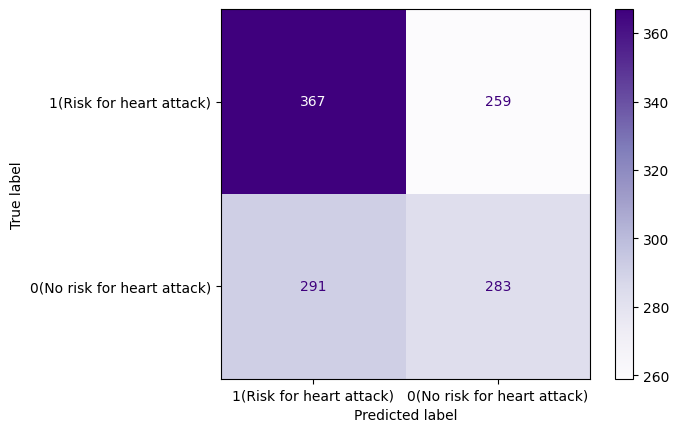

In [8]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_entropy)
print(cm)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[0]])

disp.plot(cmap=plt.cm.Purples)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

The top-left cell (367): Represents the number of instances of the positive class correctly classified as positive (True Positives - TP). This means that 367 instances that are at risk for heart attack were correctly identified as being at risk.

The top-right cell (259): Represents the number of instances of the positive class incorrectly classified as negative (False Negatives - FN). This shows that 259 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

The bottom-left cell (291): Represents the number of instances of the negative class incorrectly classified as positive (False Positives - FP). This indicates that 291 instances that are not at risk were mistakenly predicted to have a risk of heart attack.

The bottom-right cell (283): Represents the number of instances of the negative class correctly classified as negative (True Negatives - TN). This means that 283 instances that do not have a risk of heart attack were correctly identified as such.

# Decision Tree:

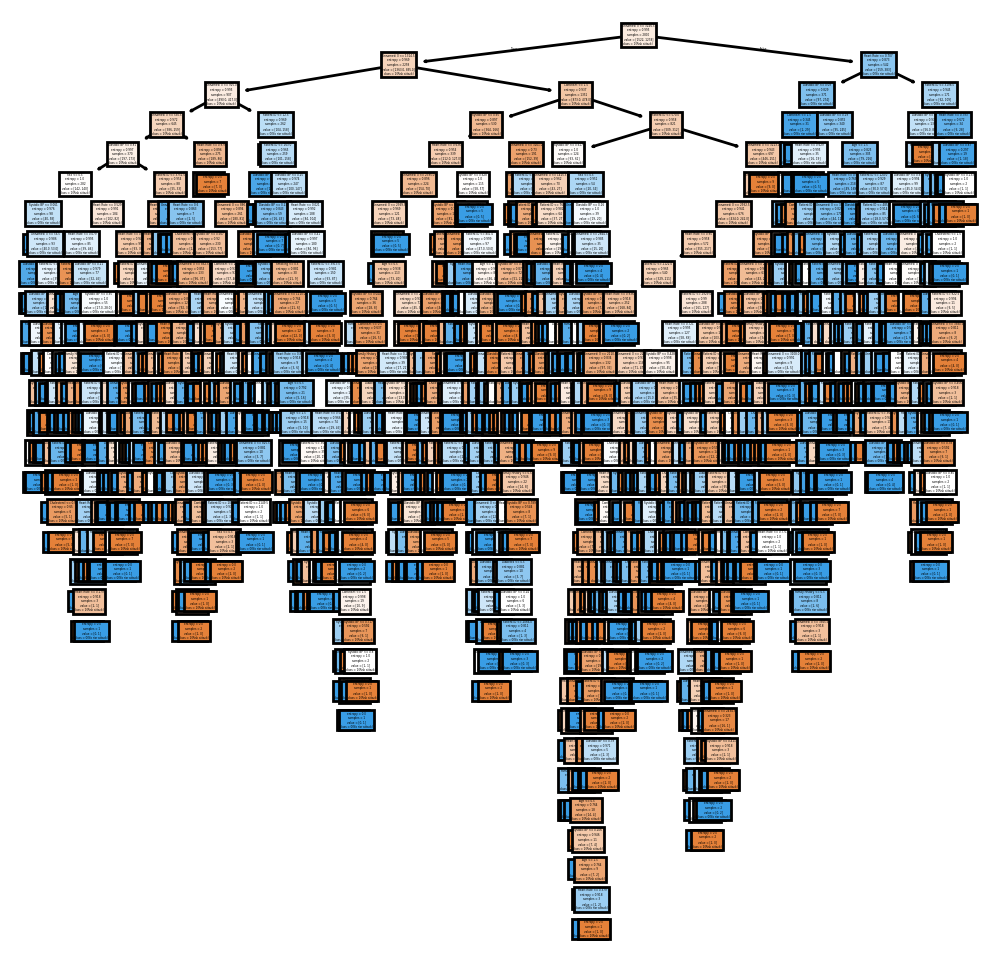

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)


class_labels = {1: '1(Risk attack)' , 0:'0(No risr attack)'}

tree.plot_tree(clf_entropy,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]], 
               filled=True
               )

plt.show()

The result of the code is a visual representation of a decision tree that illustrates how the data is split based on different features to determine the risk of heart attack. The tree begins at the root node, where the first feature is evaluated, and continues to branch out based on specific threshold values for various attribute. Each internal node represents a decision point based on a feature, while the leaf nodes indicate the final classification: whether there is a risk (1) or no risk (0) of heart attack. 

Overall, this decision tree provides insight into how the model makes classifications based on different health indicators, making it a valuable tool for understanding and interpreting heart attack risk assessments.

In [ ]:
filename = 'decision_tree_model. sav' 
pickle.dump (clf, open (filename, 'wb'))

# Completing in model evaluation and selection:


In [10]:
# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_entropy)
print("Accuracy:", accuracy)

# Error Rate
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

Accuracy: 0.5416666666666666
Error Rate: 0.45833333333333337
Sensitivity: 0.4930313588850174
Specificity: 0.5862619808306709
Precision: 0.522140221402214


- Accuracy: This metric indicates the proportion of correct predictions made by the model. In this instance, the model achieves an accuracy of approximately 54%.

- Error Rate: This represents the proportion of incorrect predictions relative to all predictions made. In this case, the error rate is about 45%.

- Sensitivity (Recall): This measures the percentage of actual positive cases that are correctly identified by the model. Here, the sensitivity is approximately 49%.

- Specificity: This metric assesses the proportion of actual negative cases that are correctly identified. In this scenario, specificity is around 58%.

- Precision: This indicates the ratio of positive predictions that are actually correct. In this case, the precision is about 52%.

Results:
The model shows moderate accuracy, successfully predicting the correct class classification for about 54% of cases.

At a sensitivity of 49%, the model shows good ability to identify positive cases of the condition. Conversely, its specificity is significantly higher at 58%, indicating that it is relatively efficient at identifying negative cases or cases without risk for heart attack.

The accuracy rate was recorded at 52%, indicating moderate predictions made by the model. Overall, these metrics suggest that the model has a reasonable level of effectiveness in distinguishing between positive and negative cases.

# Splitting Data into: 60% Training and 40% Test:

The model is trained utilizing the information gain(entropy), and the dataset is divided into 60% training and 40% testing subsets.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf2 = DecisionTreeClassifier(criterion='entropy')

clf2 = clf2. fit (X_train, y_train)

y_pred_entropy2 = clf2.predict (X_test)

# confusion matrix:

[[491 357]
 [383 369]]


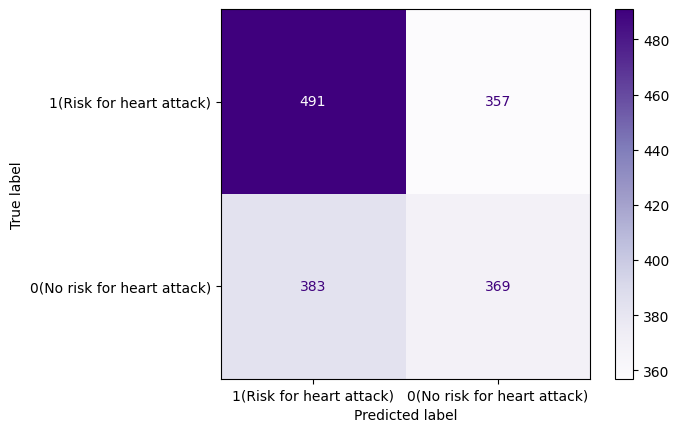

In [12]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_entropy2)
print(cm)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[0]])

disp.plot(cmap=plt.cm.Purples)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

The top-left cell (491): Represents the number of instances of the positive class correctly classified as positive (True Positives - TP). This means that 491 instances that are at risk for heart attack were correctly identified as being at risk.

The top-right cell (357): Represents the number of instances of the positive class incorrectly classified as negative (False Negatives - FN). This shows that 357 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

The bottom-left cell (383): Represents the number of instances of the negative class incorrectly classified as positive (False Positives - FP). This indicates that 383 instances that are not at risk were mistakenly predicted to have a risk of heart attack.

The bottom-right cell (369): Represents the number of instances of the negative class correctly classified as negative (True Negatives - TN). This means that 369 instances that do not have a risk of heart attack were correctly identified as such.

# Decision Tree:

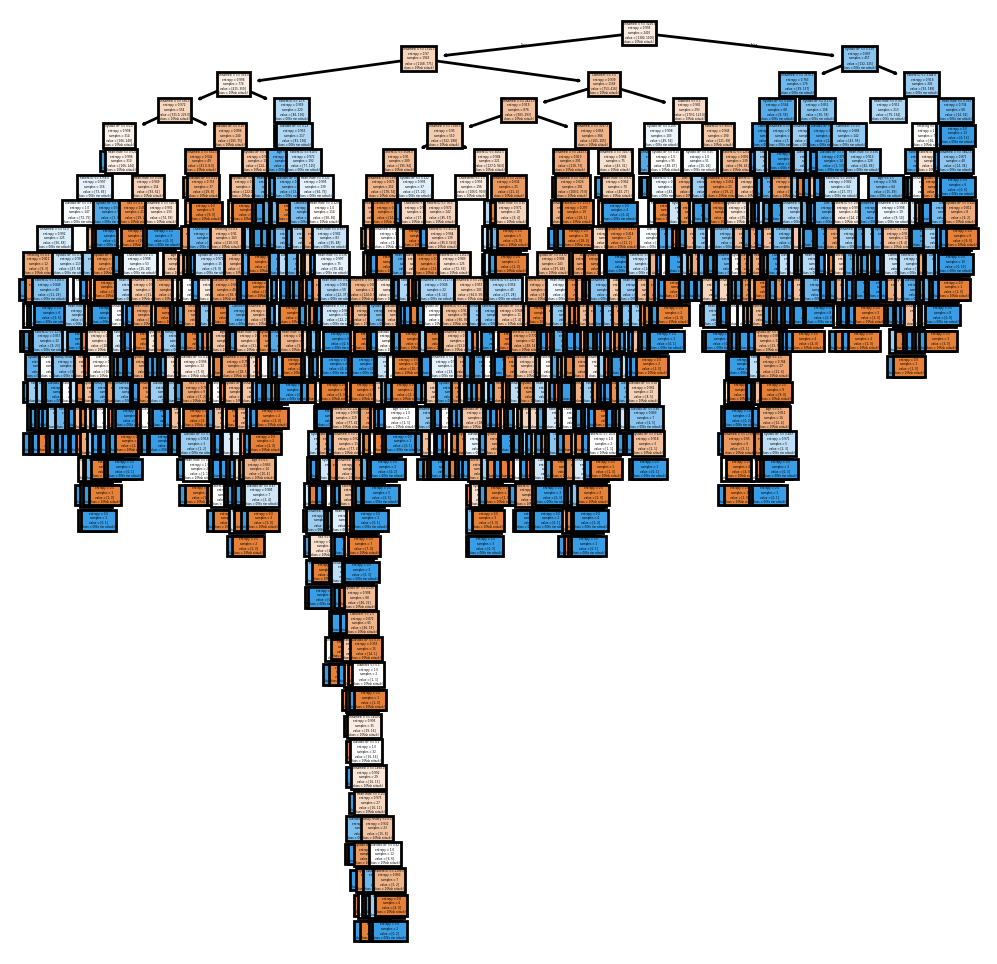

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)


class_labels = {1: '1(Risk attack)' , 0:'0(No risr attack)'}

tree.plot_tree(clf2,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]], 
               filled=True
               )

plt.show()

In this tree, data is split across multiple nodes representing decisions or conditions that lead to final classifications, in this case, "risk attack" and "no risk attack." Each node includes specific criteria and classification outcomes, with each level of the tree representing a decision step based on particular data features. This visualization helps in understanding the decision-making process and analyzing the data features in detail. However, it appears complex and somewhat difficult to read due to the tree’s depth and numerous branches, which suggests a complex model with many sub-decisions required to reach a final classification.

# Completing in model evaluation and selection:

In [14]:
# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_entropy2)
print("Accuracy:", accuracy)

# Error Rate 
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

Accuracy: 0.5375
Error Rate: 0.4625
Sensitivity: 0.49069148936170215
Specificity: 0.5790094339622641
Precision: 0.5082644628099173


- Accuracy: This metric indicates the proportion of correct predictions made by the model. In this instance, the model achieves an accuracy of approximately 53%.

- Error Rate: This represents the proportion of incorrect predictions relative to all predictions made. In this case, the error rate is about 46%.

- Sensitivity (Recall): This measures the percentage of actual positive cases that are correctly identified by the model. Here, the sensitivity is approximately 49%.

- Specificity: This metric assesses the proportion of actual negative cases that are correctly identified. In this scenario, specificity is around 57%.

- Precision: This indicates the ratio of positive predictions that are actually correct. In this case, the precision is about 50%.

Results:
The model shows moderate accuracy, successfully predicting the correct class classification for about 53% of cases.

At a sensitivity of 49%, the model shows good ability to identify positive cases of the condition. Conversely, its specificity is significantly higher at 57%, indicating that it is relatively efficient at identifying negative cases or cases without risk for heart attack.

The accuracy rate was recorded at 50%, indicating moderate predictions made by the model. Overall, these metrics suggest that the model has a reasonable level of effectiveness in distinguishing between positive and negative cases.

# Splitting Data into: 80% Training and 20% Test:

The model is trained utilizing the information gain(entropy), and the dataset is divided into 80% training and 20% testing subsets.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

clf3 = DecisionTreeClassifier(criterion='entropy')

clf3 = clf3. fit (X_train, y_train)

y_pred_entropy3 = clf3.predict (X_test)

# confusion matrix:

[[499 349]
 [369 383]]


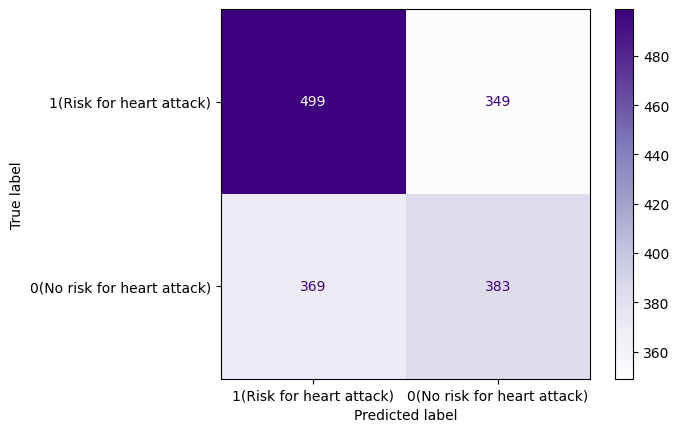

In [16]:
# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred_entropy3)
print(cm)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[class_labels[1], class_labels[0]])

disp.plot(cmap=plt.cm.Purples)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

The top-left cell (499): Represents the number of instances of the positive class correctly classified as positive (True Positives - TP). This means that 499 instances that are at risk for heart attack were correctly identified as being at risk.

The top-right cell (349): Represents the number of instances of the positive class incorrectly classified as negative (False Negatives - FN). This shows that 349 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

The bottom-left cell (369): Represents the number of instances of the negative class incorrectly classified as positive (False Positives - FP). This indicates that 369 instances that are not at risk were mistakenly predicted to have a risk of heart attack.

The bottom-right cell (383): Represents the number of instances of the negative class correctly classified as negative (True Negatives - TN). This means that 383 instances that do not have a risk of heart attack were correctly identified as such.

# Decision Tree:

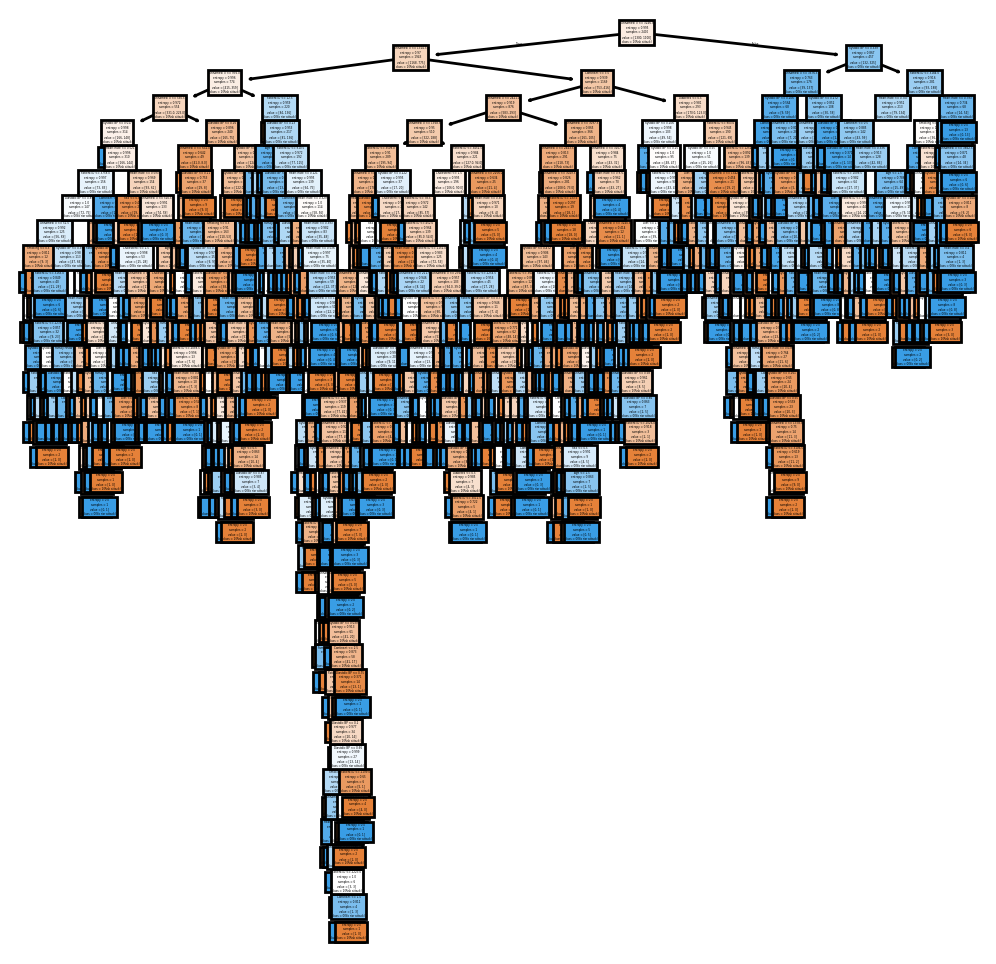

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)


class_labels = {1: '1(Risk attack)' , 0:'0(No risr attack)'}

tree.plot_tree(clf3,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]], 
               filled=True
               )

plt.show()

This image shows a complex Decision Tree used to classify data into two categories: "Risk attack" and "No risk attack." The tree starts from a root node, which represents the initial decision point, and branches out through multiple nodes that evaluate specific features or conditions in the data. At each node, the data is directed based on the results of these conditions until it reaches a leaf node, which represents the final classification.

While this tree provides a detailed view of the decision-making process, the high number of nodes and branches makes it challenging to read and interpret. This complexity reflects the model’s depth and the significant number of factors it analyzes to reach a classification decision. The visualization highlights both the model's power and the difficulty of manually tracing its decision 

# Completing in model evaluation and selection:

In [18]:
# Compute Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred_entropy3)
print("Accuracy:", accuracy)

# Error Rate 
error_rate = 1 - accuracy
print("Error Rate:", error_rate)

# Sensitivity (Recall) and Specificity  require TN, FP, FN, TP :

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# Sensitivity (Recall )
sensitivity = TP / (TP + FN)
print("Sensitivity:", sensitivity)

# Specificity 
specificity = TN / (TN + FP)
print("Specificity:", specificity)

# Precision 
precision = TP / (TP + FP)
print("Precision:", precision)

Accuracy: 0.55125
Error Rate: 0.44875
Sensitivity: 0.5093085106382979
Specificity: 0.5884433962264151
Precision: 0.523224043715847


- Accuracy: This metric indicates the proportion of correct predictions made by the model. In this instance, the model achieves an accuracy of approximately 55%.

- Error Rate: This represents the proportion of incorrect predictions relative to all predictions made. In this case, the error rate is about 44%.

- Sensitivity (Recall): This measures the percentage of actual positive cases that are correctly identified by the model. Here, the sensitivity is approximately 50%.

- Specificity: This metric assesses the proportion of actual negative cases that are correctly identified. In this scenario, specificity is around 58%.

- Precision: This indicates the ratio of positive predictions that are actually correct. In this case, the precision is about 52%.

Results:
The model shows moderate accuracy, successfully predicting the correct class classification for about 55% of cases.

At a sensitivity of 50%, the model shows good ability to identify positive cases of the condition. Conversely, its specificity is significantly higher at 58%, indicating that it is relatively efficient at identifying negative cases or cases without risk for heart attack.

The accuracy rate was recorded at 52%, indicating moderate predictions made by the model. Overall, these metrics suggest that the model has a reasonable level of effectiveness in distinguishing between positive and negative cases.

# Evaluate the models of INFORMATION GAIN :

In [21]:
data = {
        "Percentages": [
        "Accuracy", "Error Rate", "Sensitivity", "Specificity", "Precision"
    ],
    "70% training, 30% testing": [
        "0.541666666666666", "0.458333333333337", "0.4930313588850174", "0.5862619808306709", "0.522140221402214"
    ],
    "60% training, 40% testing	": [
        "0.5375", "0.4625", "0.49069148936170215", "0.5790094339622641", 
        "0.5082644628099173 "    
    ],
    "	80% training, 20% testing": [
        "0.55125", "0.44875", "0.5093085106382979", "0.5884433962264151","0.523224043715847"
    ]
}
g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

The Information Gain results show the following model performance across different data splits for training and testing:

- Accuracy: The model trained on a 80% training set and 20% testing set achieved the highest accuracy at 0.5512 (or 55.12%), followed by the model trained on 70% training and 30% testing with an accuracy of 0.5416 (or 54.16%), and the model trained on 60% training and 40% testing with an accuracy of 0.5375 (or 53.75%).

- Error Rate: The model trained on a 60% training set and 40% testing set had the highest error rate at 0.4625	 (or 46.25%), followed by the model trained on 70% training and 30% testing with an error rate of 0.4583 (or 45.83%), and the model trained on 80% training and 20% testing with an error rate of 0.4487 (or 44.87%).

- Sensitivity: The model trained on a 80% training set and 20% testing set achieved the highest sensitivity at 0.5093 (or 50.93%), followed by the model trained on 70% training and 30% testing with 0.49303 (or 49.3%), and the model trained on 60% training and 40% testing with 0.4906 (or 49.06%).

- Specificity: The model trained on an 80% training set and 20% testing set obtained the highest specificity at 0.5884 (or 58.84%), followed by the model trained on 70% training and 30% testing with 	0.5862 (or 58.62%), and the model trained on 60% training and 40% testing with 	0.579 (or 57.9%).

- Precision: The model trained on a 80% training set and 20% testing set achieved the highest precision at 0.5232 (or 52.32%), followed by the model trained on 70% training and 30% testing with 0.5221 (or 52.21%), and the model trained on 60% training and 40% testing with 0.508 (or 50.8%).

Based on the values, the 80% training and 20% testing split appears to be the best choice for the model. This split achieves the highest accuracy (55.12%), which is typically a primary metric for assessing overall model performance. It also achieves the highest sensitivity (50.93%), Specificity(58.84%) and precision (52.32%), meaning it is effective at correctly identifying positive cases and minimizing false positives.
Additionally, the error rate for this split (44.87%) is the lowest among the three splits, indicating fewer incorrect predictions. Overall, this balance between sensitivity, specificity, and accuracy suggests it is well-suited for maintaining reliable predictions across different metrics.

# GINI Index 
# Splitting Data into 70% Training and 30% Test

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#Create decision tree classifer object:
clf_gini = DecisionTreeClassifier(criterion='gini')

#Train decision tree classifer
clf_gini = clf_gini.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_gini = clf_gini.predict(X_test)

# confusion matrix 

[[356 270]
 [292 282]]


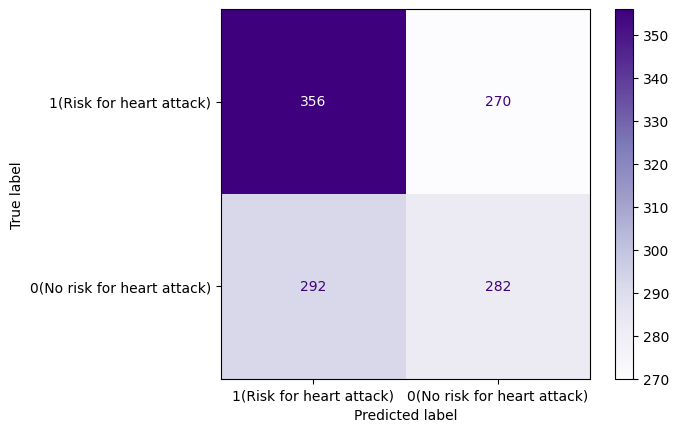

In [23]:
# Compute and print the confusion matrix
cm_gini = confusion_matrix(y_test, y_pred_gini)
print(cm_gini)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp_gini = ConfusionMatrixDisplay(confusion_matrix=cm_gini, display_labels=[class_labels[1], class_labels[0]])

disp_gini.plot(cmap=plt.cm.Purples)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification. From the results, it appears:

- Top-left cell (356):Represents the number of true positives (TP). This indicates that 356 instances with a risk of heart attack were correctly identified as being at risk.

- Top-right cell (270):Represents the number of false negatives (FN). This means that 270 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

- Bottom-left cell (292): Represents the number of false positives (FP). This shows that 292 instances without a risk of heart attack were incorrectly predicted as being at risk.

- Bottom-right cell (282):Represents the number of true negatives (TN). This means that 282 instances without a risk of heart attack were correctly identified as not being at risk.

# Decision Tree 


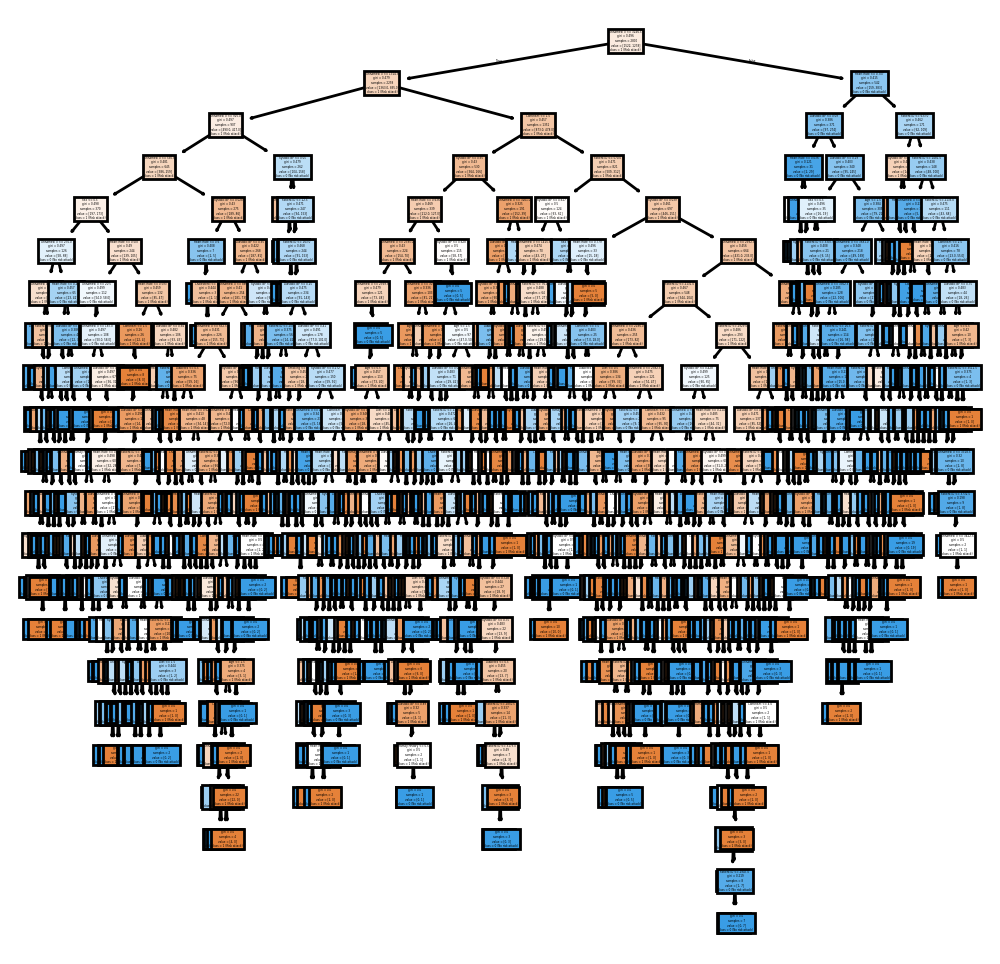

In [24]:
# Plot the decision tree for Gini index
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)

class_labels = {1: '1 (Risk attack)', 0: '0 (No risk attack)'}

tree.plot_tree(clf_gini,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]], 
               filled=True
               )

plt.show()


This code is used to plot a decision tree for a classifier that has been trained using the Gini index as the criterion.

First, it sets up a plot with a figure size of 6x6 inches and a high resolution of 200 DPI.
The `class_labels` dictionary maps class values `1` and `0` to their descriptive labels: `1` corresponds to "Risk attack" and `0` corresponds to "No risk attack."

These labels are then used to display meaningful class names in the decision tree plot.
 The resulting plot allows one to see how the decision tree classifies input data and makes decisions based on the Gini index criterion,Each internal node represents a decision point based on a feature, while the leaf nodes indicate the final classification: whether there is a risk (1) or no risk (0) of heart attack.

# Completing in model evaluation and selection:

In [25]:

# Compute Accuracy
accuracy_gini = metrics.accuracy_score(y_test, y_pred_gini)
print("Accuracy:", accuracy_gini)

# Error Rate
error_rate_gini = 1 - accuracy_gini
print("Error Rate:", error_rate_gini)

# Sensitivity (Recall) and Specificity require TN, FP, FN, TP:
TP = cm_gini[1, 1]
TN = cm_gini[0, 0]
FP = cm_gini[0, 1]
FN = cm_gini[1, 0]

# Sensitivity (Recall)
sensitivity_gini = TP / (TP + FN)
print("Sensitivity:", sensitivity_gini)

# Specificity
specificity_gini = TN / (TN + FP)
print("Specificity:", specificity_gini)

# Precision
precision_gini = TP / (TP + FP)
print("Precision:", precision_gini)

Accuracy: 0.5316666666666666
Error Rate: 0.4683333333333334
Sensitivity: 0.4912891986062718
Specificity: 0.5686900958466453
Precision: 0.5108695652173914


The results presented are metrics used to evaluate the performance of a classification model. 

1-Accuracy (0.5316):This represents the proportion of correct predictions (both true positives and true negatives) out of all predictions made by the model. In this case, the model correctly predicted the class about 53.16% of the time, which indicates that its overall performance is slightly better than random guessing, but it's not very high.

2-Error Rate (0.4683):The error rate is the complement of accuracy, representing the proportion of incorrect predictions made by the model. In this case, the model made errors in about 46.83% of the predictions. This value is high, suggesting the model may not be performing very well.

3-Sensitivity (0.4912):also known as recall or true positive rate, measures the model's ability to correctly identify positive cases (1, "risk attack"), a sensitivity of 49.12% means that the model correctly identified approximately 49% of the actual positive cases, but it failed to identify more than half of the actual positives.

4-Specificity (0.5668):also known as the true negative rate, measures the model's ability to correctly identify negative cases (0, "No risk attack"). A specificity of 56.68% means the model correctly identified the cases where there was no risk of an attack. This shows that the model is slightly better at identifying negative cases than positive ones.

5-Precision (0.5108):measures how many of the positive predictions made by the model are actually correct. With a precision of 51.08%, the model's positive predictions are only about half correct. This suggests the model may have a significant number of false positives (incorrectly labeling non-risk cases as risk).

Overall, the model has moderate performance but struggles with identifying positive cases and has a high error rate.

# Splitting Data into: 60% Training and 40% Test:

In [26]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.4, random_state=1)

#Create decision tree classifer object:
clf_gini2 = DecisionTreeClassifier(criterion='gini')

#Train decision tree classifer
clf_gini2 = clf_gini2.fit(X_train1, y_train1)

#Predict the response for test dataset
y_pred_gini2 = clf_gini2.predict(X_test1)

# Confusion Matrix


[[356 270]
 [292 282]]


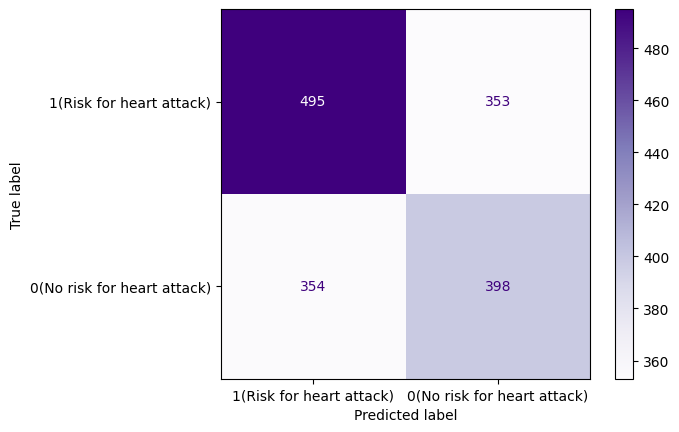

In [27]:
# Compute and print the confusion matrix
cm_gini2= confusion_matrix(y_test1, y_pred_gini2)
print(cm_gini)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp_gini = ConfusionMatrixDisplay(confusion_matrix=cm_gini2, display_labels=[class_labels[1], class_labels[0]])

disp_gini.plot(cmap=plt.cm.Purples)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification:

- Top-left cell (495):Represents the number of true positives (TP). This indicates that 495 instances with a risk of heart attack were correctly identified as being at risk.

- Top-right cell (353):Represents the number of false negatives (FN). This means that 353 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

- Bottom-left cell (354): Represents the number of false positives (FP). This shows that 354 instances without a risk of heart attack were incorrectly predicted as being at risk.

- Bottom-right cell (398):Represents the number of true negatives (TN). This means that 398 instances without a risk of heart attack were correctly identified as not being at risk.

# Decision Tree 


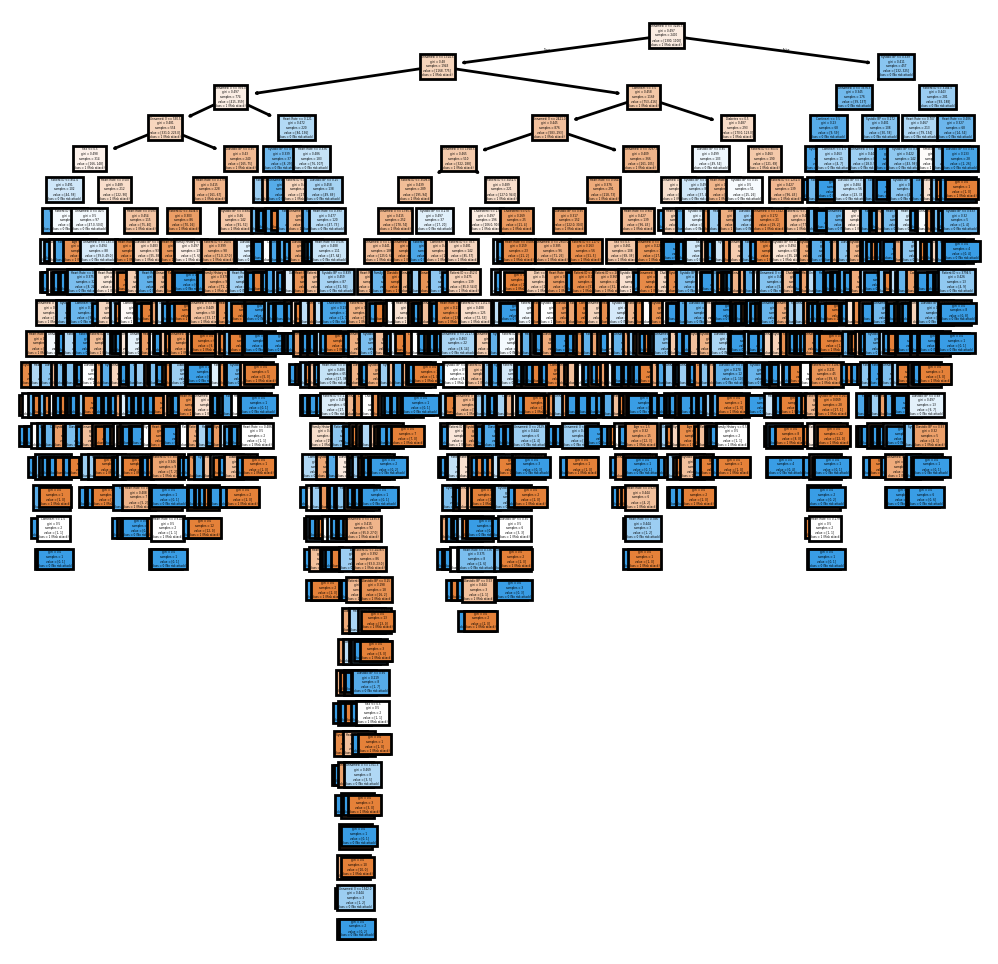

In [28]:
# Plot the decision tree for Gini index
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)

class_labels = {1: '1 (Risk attack)', 0: '0 (No risk attack)'}

tree.plot_tree(clf_gini2,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]], 
               filled=True
               )

plt.show()

A decision tree is a model used for classification or regression that splits data into subsets based on feature values, creating a tree-like structure.

In this code, a decision tree is plotted for a classifier trained using the Gini index as the splitting criterion. The `class_labels` dictionary maps the class values `1` and `0` to descriptive labels: `1` stands for "Risk attack" and `0` stands for "No risk attack."

These labels are used to show meaningful class names in the tree. The plot visualizes how the decision tree classifies input data, with each internal node representing a decision based on a feature, and the leaf nodes showing the final classification—either a risk or no risk of a heart attack.

# Completing in model evaluation and selection:

In [29]:
# Compute Accuracy
accuracy_gini = metrics.accuracy_score(y_test1, y_pred_gini2)
print("Accuracy:", accuracy_gini)

# Error Rate
error_rate_gini = 1 - accuracy_gini
print("Error Rate:", error_rate_gini)

# Sensitivity (Recall) and Specificity require TN, FP, FN, TP:
TP = cm_gini2[1, 1]
TN = cm_gini2[0, 0]
FP = cm_gini2[0, 1]
FN = cm_gini2[1, 0]

# Sensitivity (Recall)
sensitivity_gini = TP / (TP + FN)
print("Sensitivity:", sensitivity_gini)

# Specificity
specificity_gini = TN / (TN + FP)
print("Specificity:", specificity_gini)

# Precision
precision_gini = TP / (TP + FP)
print("Precision:", precision_gini)

Accuracy: 0.558125
Error Rate: 0.441875
Sensitivity: 0.5292553191489362
Specificity: 0.5837264150943396
Precision: 0.5299600532623169


These results provide key performance metrics for a classification model:

1-Accuracy (0.5581): The model correctly predicted the outcome 55.81% of the time. This is a moderate level of accuracy, suggesting the model performs slightly better than random guessing.
  
2-Error Rate ( 0.4418):The error rate is the complement of accuracy and represents the proportion of incorrect predictions. Here, 44.18% of the predictions were wrong, indicating the model makes errors almost as often as it gets predictions right.

3-Sensitivity (0.5292): Also known as recall or true positive rate, it measures how well the model identifies positive cases. A sensitivity of 52.92% means the model correctly identifies just over half of the actual positive cases, but it misses nearly half of them.

4-Specificity (0.5837):or true negative rate, measures the model’s ability to correctly identify negative cases. A specificity of 58.37% means the model successfully identifies about 58% of the true negative cases.

5-Precision (0.52.99): Precision measures how many of the predicted positive cases are actually correct. With a precision of 52.99%, the model's positive predictions are slightly more than half correct, meaning it also makes a significant number of false positives.

Overall Interpretation:
The model shows moderate performance with an accuracy of 55.8%, indicating it has room for improvement. While its ability to identify negative cases is better than its ability to identify positive cases, 
both the sensitivity and precision are around 53%, suggesting the model struggles with balancing correct positive predictions while avoiding false positives. 
The error rate of 44.18% also indicates a significant number of misclassifications.

# Splitting Data into 80% Training and 20% Test

In [30]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=1)

#Create decision tree classifer object:
clf_gini3 = DecisionTreeClassifier(criterion='gini')

#Train decision tree classifer
clf_gini3 = clf_gini3.fit(X_train2, y_train2)

#Predict the response for test dataset
y_pred_gini3 = clf_gini3.predict(X_test2)

# Confusion Matrix

[[222 187]
 [183 208]]


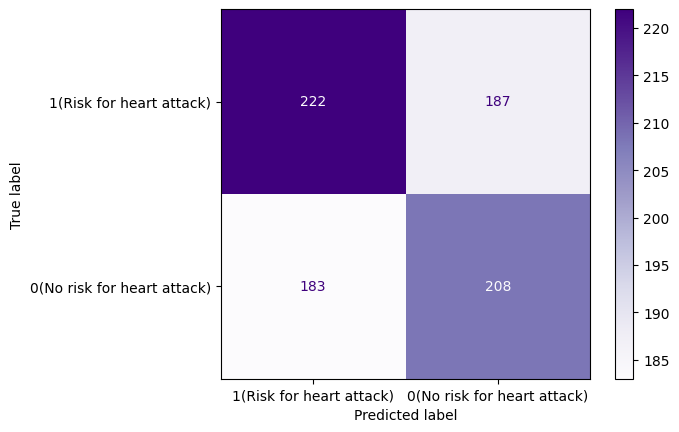

In [31]:
# Compute and print the confusion matrix
cm_gini3 = confusion_matrix(y_test2, y_pred_gini3)
print(cm_gini3)

class_labels = {1: '1(Risk for heart attack)', 0: '0(No risk for heart attack)'}
disp_gini = ConfusionMatrixDisplay(confusion_matrix=cm_gini3, display_labels=[class_labels[1], class_labels[0]])

disp_gini.plot(cmap=plt.cm.Purples)
plt.show()

The confusion matrix represents the performance measurement of the classification model. In this case, we have a 2x2 confusion matrix where each row represents the actual classification, and each column represents the predicted classification:

- Top-left cell (222):Represents the number of true positives (TP). This indicates that 222 instances with a risk of heart attack were correctly identified as being at risk.

- Top-right cell (187):Represents the number of false negatives (FN). This means that 187 instances that actually have a risk of heart attack were incorrectly classified as not having a risk.

- Bottom-left cell (183): Represents the number of false positives (FP). This shows that 183 instances without a risk of heart attack were incorrectly predicted as being at risk.

- Bottom-right cell (208):Represents the number of true negatives (TN). This means that 208 instances without a risk of heart attack were correctly identified as not being at risk.

# Decision Tree 


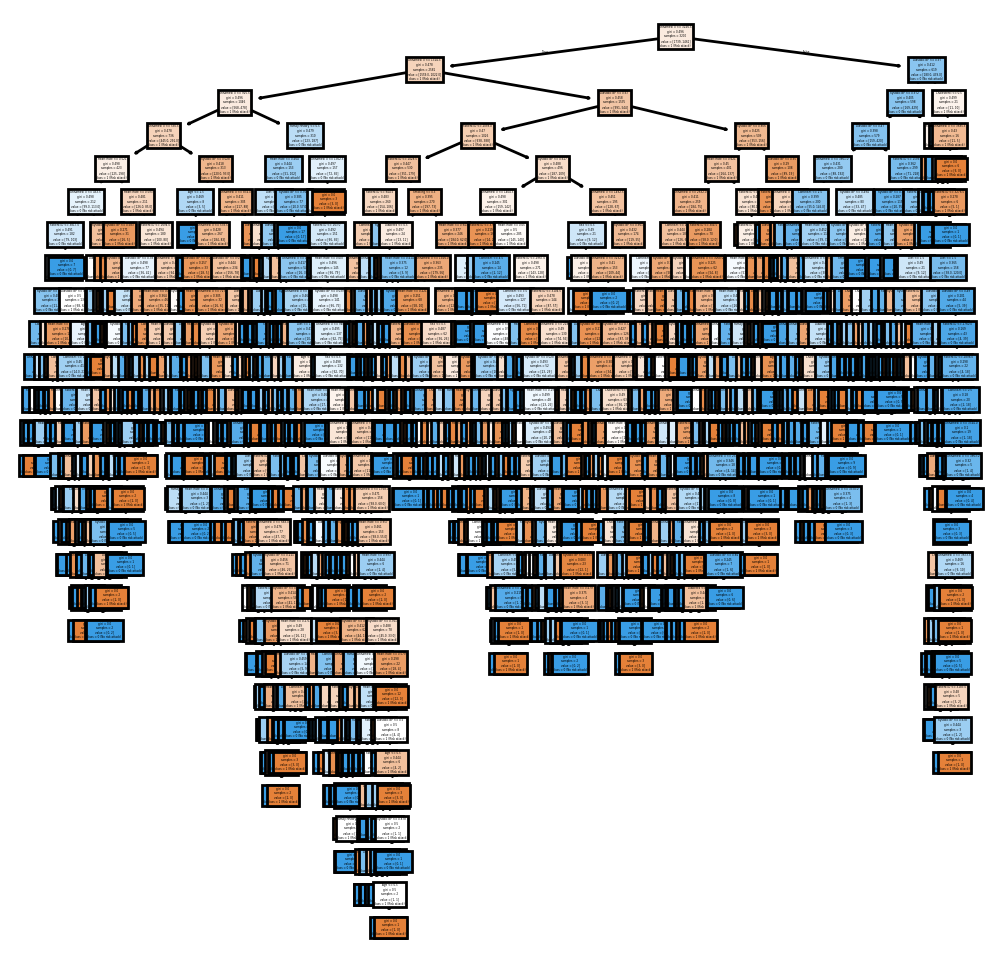

In [32]:
# Plot the decision tree for Gini index
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), dpi=200)

class_labels = {1: '1 (Risk attack)', 0: '0 (No risk attack)'}

tree.plot_tree(clf_gini3,
               feature_names=fn,
               class_names=[class_labels[1], class_labels[0]], 
               filled=True
               )

plt.show()

A decision tree is a model used for classification or regression that splits data into subsets based on feature values, forming a tree-like structure.A decision tree is plotted for a classifier trained using the Gini index.The class values 1 and 0 to "Risk attack" and "No risk attack,".

The tree shows how the model classifies data, with each node representing a decision based on a feature.
However, the tree is complex and difficult to read, making it challenging to interpret and use for decision-making.

# Completing in model evaluation and selection:

In [33]:
# Compute Accuracy
accuracy_gini = metrics.accuracy_score(y_test2, y_pred_gini3)
print("Accuracy:", accuracy_gini)

# Error Rate
error_rate_gini = 1 - accuracy_gini
print("Error Rate:", error_rate_gini)

# Sensitivity (Recall) and Specificity require TN, FP, FN, TP:
TP = cm_gini3[1, 1]
TN = cm_gini3[0, 0]
FP = cm_gini3[0, 1]
FN = cm_gini3[1, 0]

# Sensitivity (Recall)
sensitivity_gini = TP / (TP + FN)
print("Sensitivity:", sensitivity_gini)

# Specificity
specificity_gini = TN / (TN + FP)
print("Specificity:", specificity_gini)

# Precision
precision_gini = TP / (TP + FP)
print("Precision:", precision_gini)

Accuracy: 0.5375
Error Rate: 0.4625
Sensitivity: 0.5319693094629157
Specificity: 0.5427872860635696
Precision: 0.5265822784810127


These results represent key performance metrics for a classification model:

1-Accuracy (0.5375): The model correctly predicted the outcome 53.75% of the time. This is a moderate level of accuracy, indicating that the model is correct just over half of the time.

2-Error Rate (0.4625): The error rate is the complement of accuracy and shows the proportion of incorrect predictions. Here, 46.25% of the predictions were incorrect, meaning the model makes a significant number of errors.

3-Sensitivity ( 0.5319): Also known as recall or the true positive rate, sensitivity measures the model's ability to correctly identify positive cases (risk of attack). A sensitivity of 53.19% means the model identifies just over half of the actual positive cases but misses the other half.

4-Specificity (0.5427):or the true negative rate, indicates how well the model identifies negative cases (no risk of attack). A specificity of 54.27% means the model correctly identifies approximately 54% of the true negative cases.

5-Precision (0.5265): Precision measures the accuracy of the model's positive predictions. With a precision of 52.65%, the model’s positive predictions are correct just over half of the time, meaning it also produces a substantial number of false positives.

Overall Interpretation:
The model shows moderate performance with an accuracy of 53.75%. While its specificity is better than its sensitivity, indicating it is slightly better at identifying negative cases, 
both sensitivity and precision are just above 52%, suggesting it struggles with balancing false positives and false negatives. 
The relatively high error rate (46.25%) suggests that the model could benefit from further improvements to make more accurate predictions.

# Evaluate The models of Gini Index

In [35]:
import jinja2

data = {
        "Percentages": [
        "Accuracy", "Error Rate", "Sensitivity", "Specificity", "Precision"
    ],

    "70% training, 30% testing": [
        " 0.5316666666666666", "0.4683333333333334", "0.4912891986062718", " 0.56869009584664553", " 0.5108695652173914"
    ],
    "60% training, 40% testing	": [
        "0.558125", "0.441875", " 0.529255319148962", "0.5837264150943396", 
        "0.5299600532623169"    
    ],
    "	80% training, 20% testing": [
        "0.5375", "0.4625", "0.5319693094629157", "0.5427872860635696","0.5265822784810127"
    ]
}
g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})

Using these four metrics, we can determine which model is better suited for making predictions.

Accuracy: Measures the overall correctness of the model by calculating the ratio of correctly predicted observations to the total observations.

Error Rate: Represents the proportion of incorrect predictions made by the model.
Sensitivity (Recall): Reflects the model's ability to correctly identify positive cases (true positives). It focuses on reducing false negatives.

Specificity: Measures the ability of the model to correctly identify negative cases (true negatives). It focuses on reducing false positives.

Precision: Indicates the proportion of positive identifications that were actually correct. It focuses on reducing false positives.

The results show the following model performance across different data splits for training and testing:

Accuracy: The model trained on a 60% training set and 40% testing set achieved the highest accuracy at 0.5581 (or 55.81%), followed by the model trained on 80% training and 20% testing with an accuracy of 0.5375 (or 53.75%), and the model trained on 70% training and 30% testing with an accuracy of 0.53166 (or 53.16%).

Error Rate: The model trained on a 70% training set and 30% testing set had the highest error rate at 0.4683 (or 46.83%), followed by the model trained on 80% training and 20% testing with an error rate of 0.4625 (or 46.25%), and the model trained on 60% training and 40% testing with an error rate of 0.4418 (or 44.18%).

Sensitivity: The model trained on a 80% training set and 20% testing set achieved the highest sensitivity at 0.5319 (or 53.19%), followed closely by the model trained on 60% training and 40% testing with a sensitivity of 0.5292 (or 52.92%), and the model trained on 70% training and 30% testing with a sensitivity of 0.4912 (or 49.12%).

Specificity: Specificity remained consistent across all splits, with the model trained on 60% training and 40% testing achieving 0.5837 (or 58.37%), followed by 70% training and 30% testing with 0.5686 (or 56.86%), and 80% training and 20% testing with 0.5427 (or 54.27%).

Precision: The model trained on an 60% training set and 40% testing set obtained the highest precision at 0.5299 (or 52.99%), followed by the model trained on 80% training and 20% testing with 0.5265 (or 52.65%), and the model trained on 70% training and 30% testing with 0.5108 (or 51.08%).

Analysis:  
Based on these metrics, the *60% training and 40% testing split* appears to be the best choice for the model. 
This split achieves the highest accuracy (55.81%), Specificity (58.37%) and Precision(or 52.99%) which are key metrics for assessing overall performance and the ability to correctly identify positive cases.

Furthermore, it has the lowest error rate (44.18%), ensuring fewer incorrect predictions.
While the 80%-20% split performs slightly better in Sensitivity, the balance provided by the 60%-40% split across all metrics suggests it is better suited for reliable predictions.

# Clustering

Clustering is an unsupervised learning process. It is a data analysis technique used to group a set of objects or data points into clusters according to how similar they are. The main goal is to ensure that items in the same cluster are more alike than those in other clusters. This similarity can be based on various attributes or features of the data. It is used for several important purposes:

1- Data Exploration: It helps in discovering patterns and structures within data, making it easier to understand the underlying relationships.

2- Dimensionality Reduction: : By grouping related things into clusters, data can be made simpler, which can aid in visualization or reducing complexity in machine learning models.

3- Recommendation Systems: Clustering helps in finding similar items or users, improving recommendations in systems like e-commerce or streaming services.

It is an effective technique for organizing and analyzing complex data, making it easier to uncover insights and patterns without needing pre-established labels or categories. It’s essential to carefully choose the clustering method and parameters to achieve meaningful results.

First, we removed the class label before clustering.
 For different reasons :

 1- Nature of clustering: because clustering is unsupervised learning.

  2- Focus on Feature Relationships: clustering algorithms analyze the relationships and distances between data points based on their features. And other reasons. Then we scale the features with a standard scaler. We use a standard scaler when features have different units or scales, as it ensures that no feature's scale dominates the others. Standard scaling leads to better model performance clustering.

In [6]:
# Extract features (excluding the target variable)
features = df.drop('Heart Attack Risk', axis=1)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
print("\n Scaled DataFrame:")
print(scaled_df.head())


 Scaled DataFrame:
   Unnamed: 0  Patient ID       Age       Sex   Cholesterol  Systolic BP  \
0   -1.731618   -1.522906  0.201549  0.659723     -1.772076     0.874913   
1   -1.730752   -1.337576  1.463205  0.659723     -0.205600     1.139754   
2   -1.729886   -1.517710  1.463205 -1.515787     -0.205600     1.480265   
3   -1.729020   -0.460293  0.201549  0.659723     -0.205600     1.064085   
4   -1.728154   -0.889841  0.201549  0.659723     -0.205600    -1.659997   

   Diastolic BP   Heart Rate  Diabetes  Family History   Smoking      Diet  \
0      0.188003    -0.143661 -1.376356       -0.982159  0.342973 -1.227402   
1      0.527297     1.133001  0.726556        1.018165  0.342973  1.237260   
2      0.934450    -0.143661  0.726556       -0.982159 -2.915680  0.004929   
3      1.002309    -0.094559  0.726556        1.018165  0.342973 -1.227402   
4      0.188003     0.887489  0.726556        1.018165  0.342973  1.237260   

   Continent  
0   1.614332  
1   0.984164  
2   0.353

**K-means Clustering**
K-means clustering is an unsupervised machine learning algorithm used to partition a dataset into K distinct clusters based on their similarities. It assigns each data point to the nearest cluster centroid and iteratively updates the centroids to minimize the within-cluster sum of squared distances.

**Silhouette method**
The Silhouette method measures how well each data point fits within its assigned cluster compared to neighboring clusters. The Silhouette score ranges from -1 to 1, with higher scores indicating better-defined and well-separated clusters.

**The Calinski-Harabasz Index**
The Calinski-Harabasz Index, also known as the Variance Ratio Criterion, considers both the within-cluster dispersion and the between-cluster dispersion to evaluate the clustering, where a higher Calinski-Harabasz Index indicates better clustering, as it suggests that the clusters are well-separated (high between-cluster variance) and compact (low within-cluster variance).

both these methods are useful for determining the optimal number of clusters (k) in a dataset, where they measure rhe clustering quality, such that the Silhouette Score focuses on the fit of individual data points to their assigned clusters, while the Calinski-Harabasz Index evaluates the overall quality of the clustering solution based on the balance of within-cluster and between-cluster variances.


In [7]:
# Evaluate K-means with different values of K
k_values = range(2, 11)  # Test K from 2 to 10 that’s mean more than 3 times
silhouette_scores = []
calinski_harabasz_scores = []
wss_values = []  # To hold Within-cluster Sum of Squares
# Calculate silhouette score and Calinski-Harabasz score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    silhouette_avg = silhouette_score(scaled_df, kmeans.labels_)
    ch_score = calinski_harabasz_score(scaled_df, kmeans.labels_)
    print(f"Sillhoutte Score for K={k}: {silhouette_avg:.2f}")
    print(f"calinski harabasz score K={k}: {ch_score:.2f}")


    silhouette_scores.append(silhouette_avg)
    calinski_harabasz_scores.append(ch_score)
    wss_values.append(kmeans.inertia_)

Sillhoutte Score for K=2: 0.13
calinski harabasz score K=2: 433.69
Sillhoutte Score for K=3: 0.09
calinski harabasz score K=3: 363.46
Sillhoutte Score for K=4: 0.09
calinski harabasz score K=4: 370.12
Sillhoutte Score for K=5: 0.10
calinski harabasz score K=5: 317.71
Sillhoutte Score for K=6: 0.10
calinski harabasz score K=6: 293.76
Sillhoutte Score for K=7: 0.08
calinski harabasz score K=7: 249.23
Sillhoutte Score for K=8: 0.07
calinski harabasz score K=8: 228.19
Sillhoutte Score for K=9: 0.07
calinski harabasz score K=9: 216.28
Sillhoutte Score for K=10: 0.07
calinski harabasz score K=10: 199.75


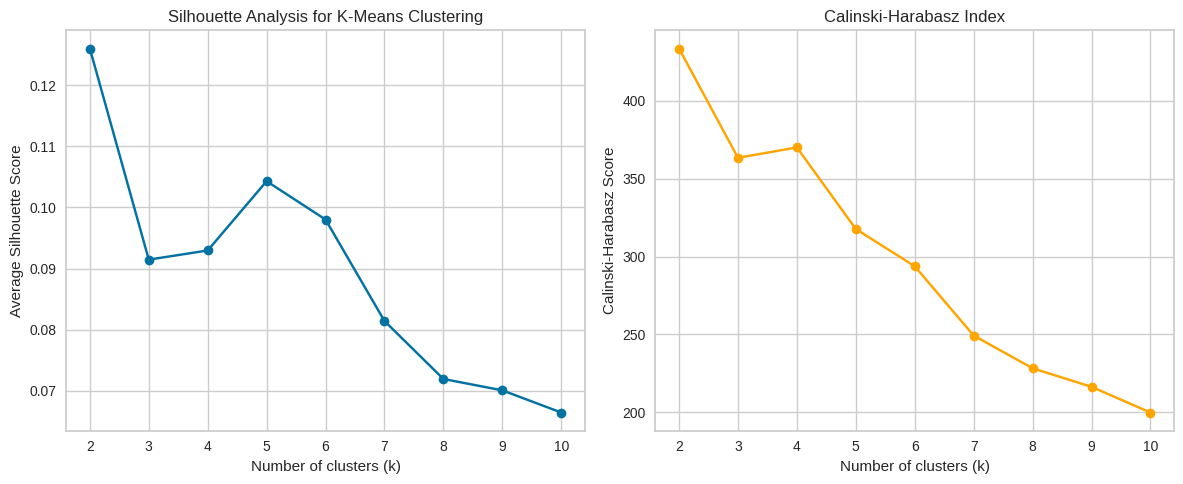

In [8]:
# Plot the results
plt.figure(figsize=(12, 5))

# Silhouette Score Plot
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for K-Means Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')

# Calinski-Harabasz Score Plot
plt.subplot(1, 2, 2)
plt.plot(k_values, calinski_harabasz_scores, marker='o', color='orange')
plt.title('Calinski-Harabasz Index')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Calinski-Harabasz Score')

plt.tight_layout()
plt.show()

The highest average Silhouette score is 0.12599557537154973 with k=2.

The second highest average Silhouette score is 0.1042966445238377 with k=5.

The highest Calinski-Harabasz score is 433.6893749551916 with k=2.

The second highest Calinski-Harabasz is 370.1212260951766 with k=4.

as you can see above We found that the optimal number of clusters (k) maximizing the average Silhouette coefficient and Calinski-Harabasz score is 2.

**The Elbow method**
The Elbow method is a technique used to determine the optimal number of clusters in a dataset for K-means clustering. It involves plotting the within-cluster sum of squares (inertia) as a function of the number of clusters. The inertia measures the compactness of the clusters, and the Elbow point represents the number of clusters where adding more clusters does not significantly reduce the inertia. The Elbow method helps in finding a balance between having a low inertia and avoiding overfitting.

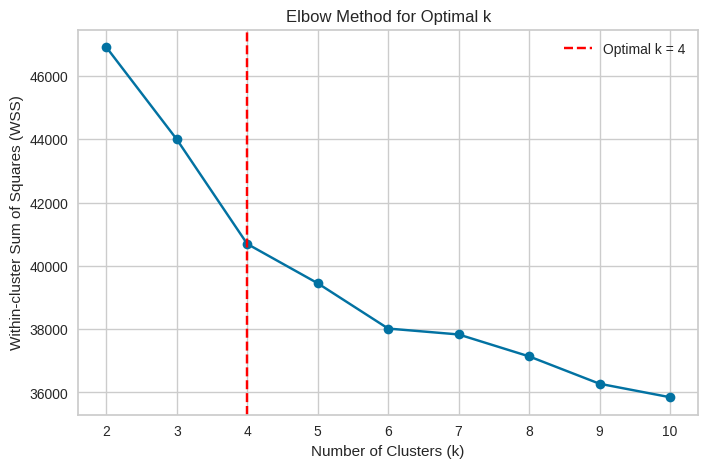

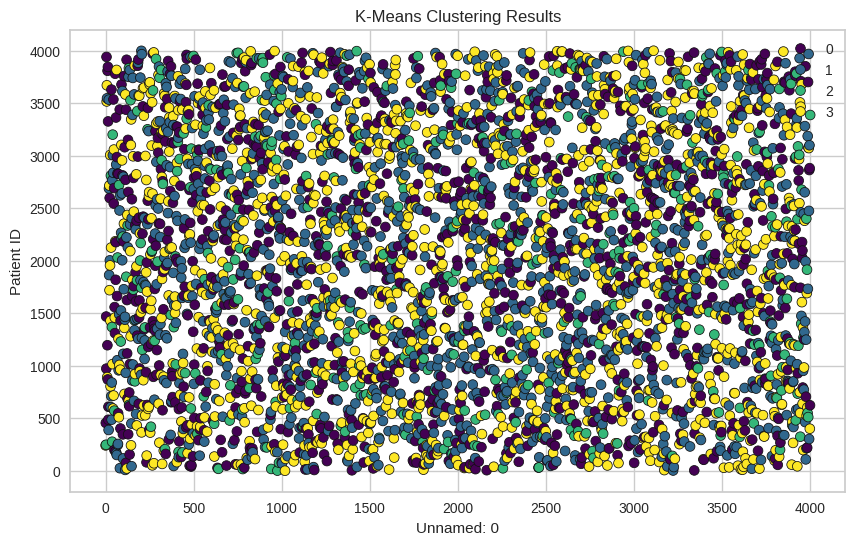

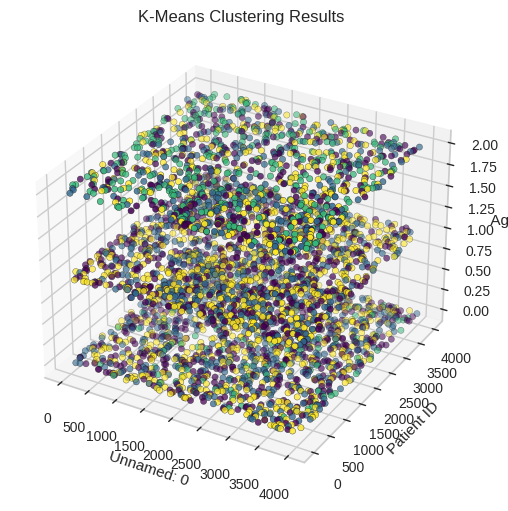

In [9]:
# Elbow Method for optimal K
plt.figure(figsize=(8, 5))
plt.plot(k_values, wss_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.axvline(x=4, linestyle='--', color='red', label='Optimal k = 4')
plt.legend()
plt.show()

# Fit KMeans with the optimal K (k=4)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_df)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_

# Visualize clustering using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue='Cluster', data=df, palette='viridis', edgecolor='k')
plt.title("K-Means Clustering Results")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.legend()
plt.show()


# Visualize clustering using a scatter plot using 3D (for more clarification)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter plot
ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=df['Cluster'], cmap='viridis', edgecolor='k')

# Set labels and title
ax.set_title("K-Means Clustering Results")
ax.set_xlabel(df.columns[0])
ax.set_ylabel(df.columns[1])
ax.set_zlabel(df.columns[2])

# Add legend
ax.legend()

# Show the plot
plt.show()

The Elbow Method analysis of the WSS curve points to 4 as the optimal number of clusters for this dataset, as this is the value where the curve starts to plateau and exhibit diminishing returns from adding more clusters.

In [10]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

np.random.seed(8953)

# Perform K-means clustering for K=2
kmeans = KMeans(n_clusters=2, random_state=8953, n_init='auto')  # Set n_init explicitly and init='auto'
kmeans_result = kmeans.fit(scaled_df)

# Print the clustering result
print("Cluster Centers:")
print(kmeans_result.cluster_centers_)
print("\nCluster Labels:")
print(kmeans_result.labels_)

Cluster Centers:
[[-3.58436717e-02  6.01612802e-03 -1.27231635e-03 -1.51578667e+00
  -1.57632283e-02  4.00246276e-03 -2.93915089e-02  1.86235034e-02
  -2.58460570e-02 -2.07502703e-02 -7.88018415e-01  1.20408800e-02
   1.94311610e-02]
 [ 1.56004211e-02 -2.61842960e-03  5.53756633e-04  6.59723442e-01
   6.86070896e-03 -1.74201196e-03  1.27922140e-02 -8.10560086e-03
   1.12491091e-02  9.03124431e-03  3.42973210e-01 -5.24061265e-03
  -8.45712174e-03]]

Cluster Labels:
[1 1 0 ... 1 1 0]


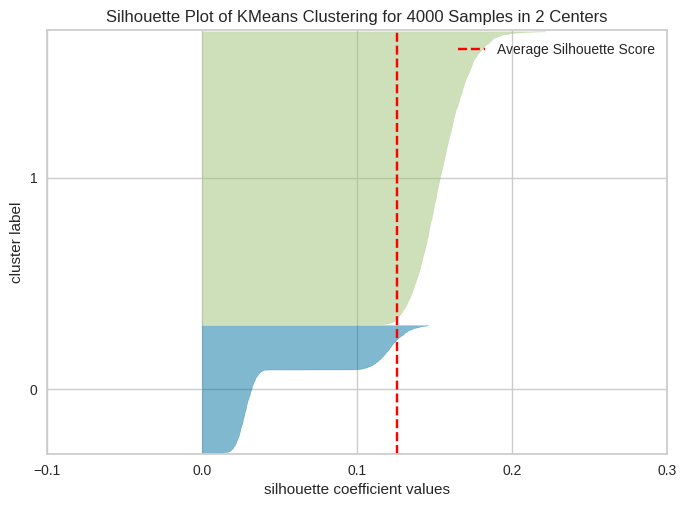

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 4000 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,n_init='auto')
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(scaled_df)
visualizer.show()

# Evaluate the best models of Clustring:


In [1]:
import pandas as pd

data = {
    " ": ["WSS", "Silhouette"],
    "k=2": ["46911", "0.125"],
    "k=3": ["43998", "0.091"],
    "k=5": ["39450", "0.104"]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

g = pd.DataFrame(data)
g.style.set_properties(**{'text-align': 'center'})


In conclusion, we've decided that K=2 is the best choice for our clustering model based on the metrics we've analyzed(WSS, Average Sihouette Score, Visualization of K-mean). du to K=2 being the highest silhouette width, also having the highest value of WSS.